# NNIA Assignment 3

**DEADLINE: 1. 12. 2021 08:00 CET**  
Submission more than 10 minutes past the deadline will **not** be graded!

- Trevor Atkins & trat00001 (Teams username: trat00001@uni-saarland.de)
- Tsimafei Prakapenka & tspr00001 (Teams username e.g. tspr00001@uni-saarland.de):
- Hours of work per person: Tsimafei - 5h   Trevor ~3.75h

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required. 
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

## 1 Concept Revision (3 points)

### 1.1 Critical Points (2 points)

Consider the following functions: $f(x)=5x^2 +4x^3 −10$ and $g(x)=6(x−3)^3 +2$.

1. Compute the first derivatives for both functions. (0.5 pts) \

2. Compute the second derivatives for both functions. (0.5 pts) \

3. Find all critical points for both functions (using first and second derivatives) and give their types (refer to lecture slides). Make sure to comment on how one determines the types of critical points. (1 pt)

### 1.2 Activation Functions (1 points)

Three of the most commonly-used activation functions are the sigmoid function, hyperbolic tangent, and ReLU. The equations for these functions are provided below:

* $\sigma(x) = \frac{1}{1+e^{-x}}$  

* $\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

* $ReLU(x) =  \bigg\{ \begin{array}{ll} 0, & x < 0 \\ x, & x > 0 \\ \end{array}$

Using code or an online resource like Wolfram Alpha, Geogebra or Desmos, graph each function along with its derivative.
1. Discuss the differences you observe. (1 sentence)
2. What are the advantages and disadvantages of each? In particular, think about how the range of the function and the amplitude of the derivative would affect a network. (2 sentences)


### 1.1 <font color="green">Solution</font>

1.  
$f'(x) = 10x + 12x^2$ \
$g'(x) = 18(x-3)^2$
2.  
$f''(x) = 10 + 24x$ \
$g''(x) = 36(x-3)$     
3.  
Critical point(s) for $f'(x)$ are $-\frac{5}{6}$ and $0$.
Critical point(s) for $g'(x)$ is $3$.
Critical point(s) for $f''(x)$ is $-\frac{5}{12}$.
Critical point(s) for $g''(x)$ is $3$.<br>
With the second derivative test:<br>
If the second derivative is less than zero substituting the critical point(s), the stationary point is a maximum.<br>
If the second derivative is greater than zero substituting the critical point(s), the stationary point is a minimum.<br>
If the second derivative equals zero substituting the critical point(s) it is a saddle point or extremum (substituting for neighboring points, it can be distinguished.)<br>
Therefore, since the critical point(s) of $f(x)$,  substituting $-\frac{5}{6}$ into $10 + 24x$, is $-10$, indicating that it is a maximum and substituting $0$ is $10$, indicating that it is a minimum.
Since the critical point(s) of $g(x)$, substituting $3$ into $36(x-3)$ is $0$ and looking at neighboring values of $2$ is $-36$ and $4$ is $36$ so it can be determined that this critical point is a saddle point. 


### 1.2 <font color="green">Solution</font>

**Sigmoid Function:**
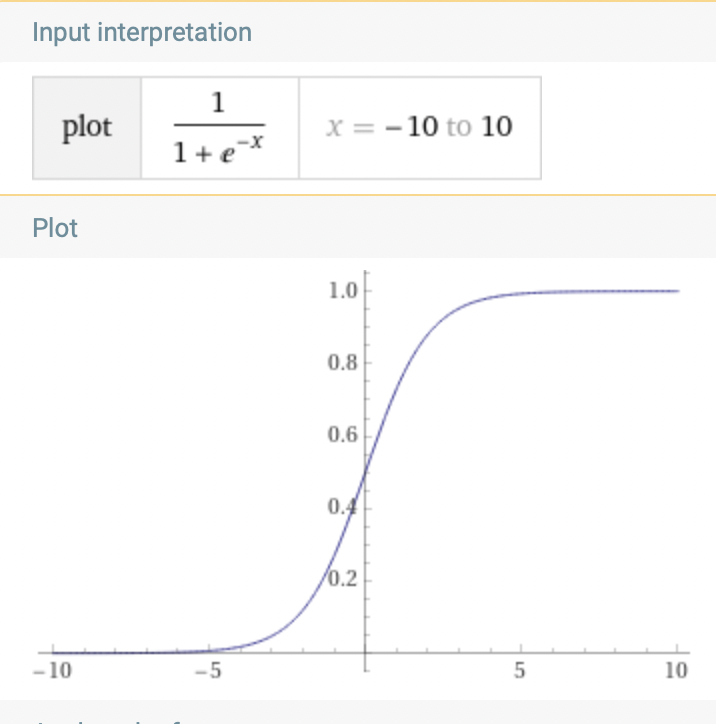

**Tanh Function:**
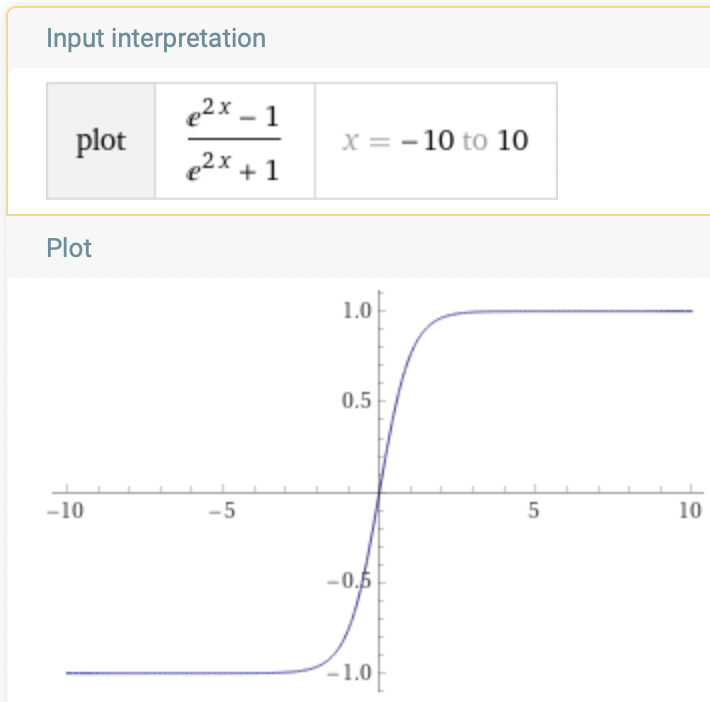


**ReLu Function:**

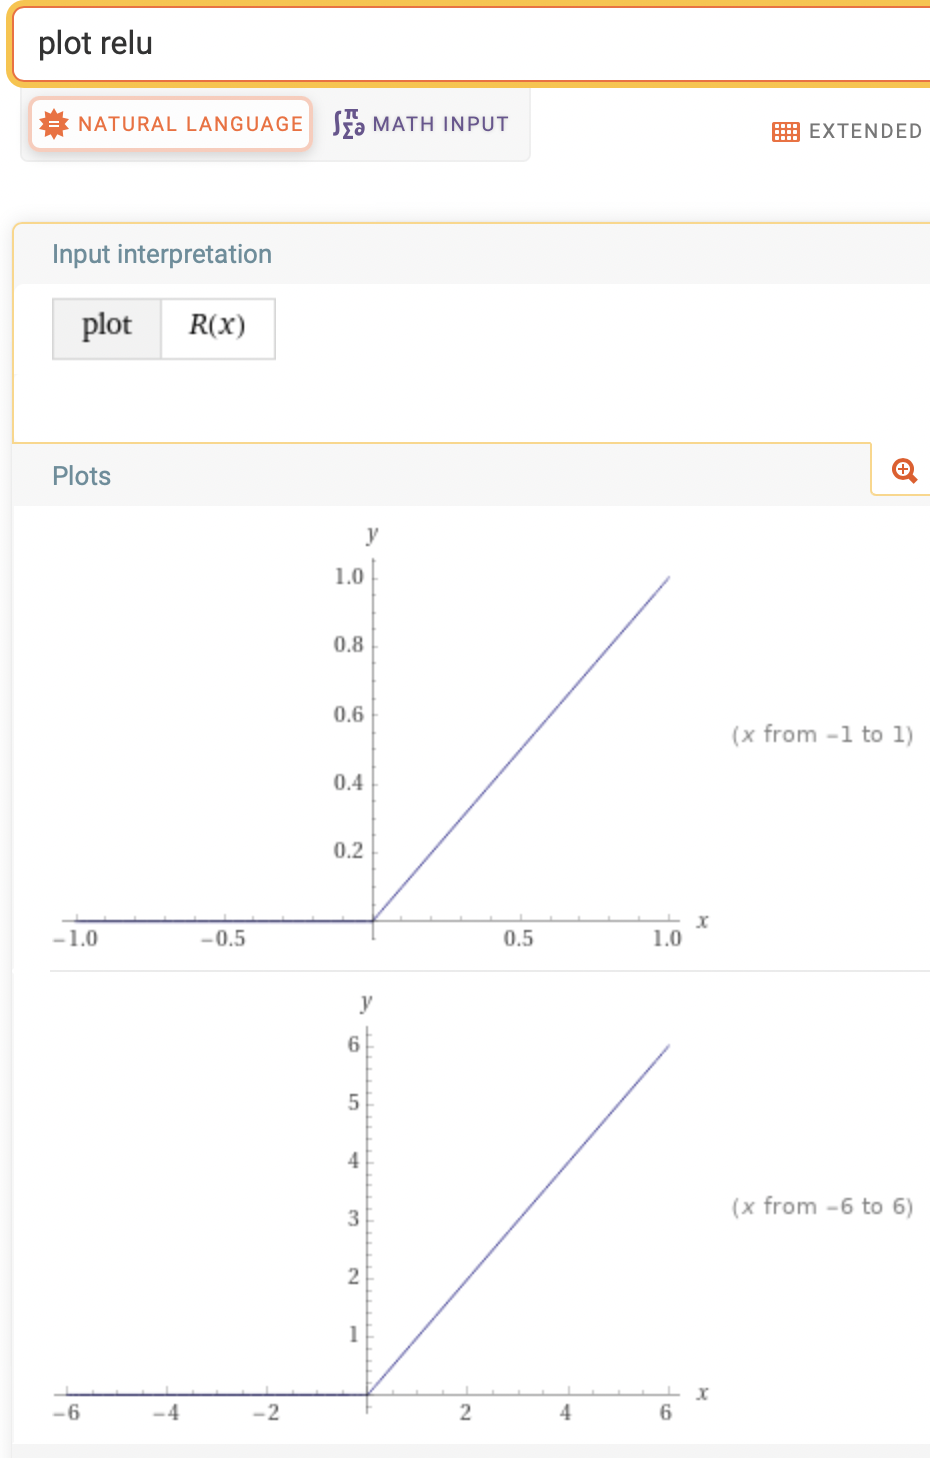

**1.2.1** ReLu is equal to zero for x < 0, then going as a basic linear function y = x. Tahn resembles sigmoid with a small difference in slope and scale (tahn has values from 0 to 1, sigmoid from -1 to 1).


**1.2.2** ReLu has an advantage of strong amplifying for positive values and removing negative values at all, which speed up the training. Both tahn and sigmoid produce large changes for y given small changes of x around zero, however for values on left and right ends of the function gradient will be vanishing (the derivative values in these regions are very small and converge to 0).

## 2.1 Visualizing Function Landscape (2 points)

Consider again the task of predicting California Housing prices. Let's restrict ourseves only on the first feature $x_0$.
Consider the regression function $a\cdot x_0 + c$ together with the $\text{MSE}$ loss.
$\text{MSE} = \frac{1}{n} \sum (y - (a\cdot x_0 + c))^2$ is a function with a single output and depends on two parameters $a$ and $c$.
Plot the function landscape of this loss based on the two parameters $(a, c)$ where $(a, c) \in (-5,5) \times (-5,5)$.
Hint, the output should be a valley sort of similar to [this image](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.sfu.ca%2F~ssurjano%2Frosen.png&f=1&nofb=1).

Here is a good [article](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) about 3D plotting in Python.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import math
import collections
import random
import operator

import numpy as np
import pandas as pd

from typing import Tuple, List, Any
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

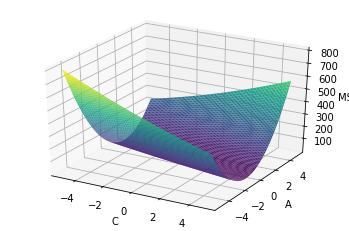

In [2]:
# TODO from your solution module import some visualize_landscape function
def visualize_landscape(x, y):
    assert len(x) == len(y)
    def _custom_mse(a: float, c: float) -> float:
        mse = 0
        for x_i, y_i in zip(x, y):
            mse += ((y_i - (a * x_i + c)) ** 2)

        return mse / len(x)
    
    a = np.linspace(-5, 5, 100)
    c = np.linspace(-5, 5, 100)

    A, C = np.meshgrid(a, c)
    MSE = _custom_mse(A, C)

    ax = plt.axes(projection='3d')
    ax.plot_surface(C, A, MSE, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('C')
    ax.set_ylabel('A')
    ax.set_zlabel('MSE')


df_house = fetch_california_housing(as_frame=True).frame
visualize_landscape(x=df_house.MedInc, y=df_house.MedHouseVal)

## 2.2 Autograd (2 points)

Consider the following expressions:   

$\hat{y} = 2\cdot a^2+a\cdot b+b$,   
$\mathcal{L} = \sum(\hat{y}_i-y_i)^2$

Compute gradients w.r.t. $a, b$ and $y$ as follows:
1. Derive the relationship symbolically (by hand). Implement it in code (the gradient formula) and validate that the results are the same.
2. Use PyTorch's autograd. You can read more about Autograd [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

We provide you with random value generator and prepared functions. Your task is to simply complete `solution_torch_autograd` and `solution_manual_autograd`.
We also provide you with correct solutions to which we compare your results. See the tutorial slides for hints.

In [3]:
! wget https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Neural_Networks/HW3_solution.py
! mv HW3_solution.py solution.py

--2021-11-30 19:36:18--  https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Neural_Networks/HW3_solution.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2150 (2.1K) [text/plain]
Saving to: ‘HW3_solution.py’

HW3_solution.py     100%[===================>]   2.10K  --.-KB/s    in 0s      

2021-11-30 19:36:18 (36.1 MB/s) - ‘HW3_solution.py’ saved [2150/2150]



In [4]:
from solution import solution_correct_autograd, value_generator


def solution_torch_autograd(a: List[float],
                            b: List[float],
                            y: List[float],
                            ) -> Tuple[List[float], List[float], List[float]]:
    assert len(a) == len(b) == len(y)
    a = torch.tensor(a, requires_grad=True)
    b = torch.tensor(b, requires_grad=True)
    y = torch.tensor(y, requires_grad=True)
    yhat = 2 * torch.square(a) + a * b + b
    L = torch.square(yhat) - 2 * yhat * y + torch.square(y)
    grad = L.sum().backward()  # backward pass
    agrad_t = a.grad
    bgrad_t = b.grad
    ygrad_t = y.grad
    assert len(agrad_t) == len(bgrad_t) == len(ygrad_t)
    return agrad_t, bgrad_t, ygrad_t


def solution_manual_autograd(a, b, y):
    assert len(a) == len(b) == len(y)
    # sorry, it is too hard 
    return 0, 0, 0


# do not touch the folowing lines of code
vals = value_generator()
agrad_c, bgrad_c, ygrad_c = solution_correct_autograd(*vals)
agrad_t, bgrad_t, ygrad_t = solution_torch_autograd(*vals)
agrad_m, bgrad_m, ygrad_m = solution_manual_autograd(*vals)

print(*vals)

# # validate torch gradient
assert all(np.isclose(agrad_t, agrad_c))
assert all(np.isclose(bgrad_t, bgrad_c))
assert all(np.isclose(ygrad_t, ygrad_c))

# # validate manual gradient
# assert all(np.isclose(agrad_m, agrad_c))
# assert all(np.isclose(bgrad_m, bgrad_c))
# assert all(np.isclose(ygrad_m, ygrad_c))

[0.66216785 0.30581968 0.94961524] [0.37782158 0.36119248 0.32668306] [0.82475412 0.72499719 0.13530429]


## 2.3 Neural Networks Hello World (3 points)

Construct a neural networks for the California Housing Prices dataset.
It is composed of two linear layers with hidden dimensionality of $32$ and ReLU after the first layer: $L_{8\rightarrow 32} \circ \text{ReLU} \circ L_{32 \rightarrow 1}$ where $L_{x\rightarrow y}$ is a linear layer with $y$ hidden nodes (`nn.Linear(x, y)`).

Split your data into dev and training sets (1000 training, 100 dev, discard rest) and optimize these networks with Adam with learning rate $10^{-3}$.
Report MSE on both training and dev sets. You can use PyTorch built-in functions to solve this exercise. 

Notes:
- Please read [this introduction to the optimization loop in PyTorch](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html). It should give you a good overview to what PyTorch needs from you to train a neural network.
- Run your training multiple times with different seeds because the results have quite high variance.
- There are many optimizers available and Adam is an optimizer that's more complex than SGD. It has not yet been covered in the lecture but its usage in code is equivalent to that of SGD and performs much better.


In [5]:
# Fix seeds for random number generators
seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
class CustomHousingDataset(Dataset):
    def __init__(self, source_df: pd.DataFrame):
        self.targets = torch.tensor(source_df.MedHouseVal.values, dtype=torch.float32).reshape(-1, 1)
        self.source_data = torch.tensor(source_df.drop(columns='MedHouseVal', axis=1).values, dtype=torch.float32)

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return self.source_data[idx], self.targets[idx]

In [8]:
def train_loop(dataloader: torch.utils.data.DataLoader,
               model: NeuralNetwork,
               loss_fn,
               optimizer: torch.optim.Optimizer,
               output_verbosity: int = 1) -> int:
    """
    This function heavily relies on the code from PyTorch tutorial listed above.

    Additionally, we have introduced output_verbosity parameter.
    """
    size = len(dataloader.dataset)
    avg_loss = 0
    for batch_id, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss.item()

        if batch_id % 5 == 0:
            loss, current = loss.item(), batch_id * BATCH_SIZE
            if output_verbosity > 1:
                print(f"Train MSE: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    num_batches = len(dataloader)
    avg_loss /= num_batches
    if output_verbosity == 1:
        print(f"Average Train MSE: {avg_loss:>8f} \n")
    return avg_loss


def validation_loop(dataloader: torch.utils.data.DataLoader,
                    model: NeuralNetwork,
                    loss_fn, output_verbosity: int = 1) -> int:
    num_batches = len(dataloader)
    validation_loss = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            validation_loss += loss_fn(pred, y).item()

    validation_loss /= num_batches
    if output_verbosity == 1:
        print(f"Validation MSE: {validation_loss:>8f} \n")
    return validation_loss

In [9]:
BATCH_SIZE = 64
TRAIN_DATASET_SIZE = 1000
VALIDATION_DATASET_SIZE = 100

LEARNING_RATE = 1e-3
EPOCHS = 10

In [10]:
model = NeuralNetwork()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [11]:
train_data = df_house.iloc[:TRAIN_DATASET_SIZE]
validation_data = df_house.iloc[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + VALIDATION_DATASET_SIZE]

train_dataset = CustomHousingDataset(train_data)
validation_dataset = CustomHousingDataset(validation_data)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [12]:
for t in range(EPOCHS):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    validation_loop(validation_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Average Train MSE: 4901.655735 

Validation MSE: 1310.848267 

Epoch 2
-------------------------------
Average Train MSE: 271.152940 

Validation MSE: 398.504684 

Epoch 3
-------------------------------
Average Train MSE: 240.341450 

Validation MSE: 101.293308 

Epoch 4
-------------------------------
Average Train MSE: 73.553063 

Validation MSE: 157.227158 

Epoch 5
-------------------------------
Average Train MSE: 63.996832 

Validation MSE: 86.499981 

Epoch 6
-------------------------------
Average Train MSE: 48.073517 

Validation MSE: 57.862984 

Epoch 7
-------------------------------
Average Train MSE: 35.244532 

Validation MSE: 51.121443 

Epoch 8
-------------------------------
Average Train MSE: 23.196013 

Validation MSE: 24.882233 

Epoch 9
-------------------------------
Average Train MSE: 6.583527 

Validation MSE: 2.922805 

Epoch 10
-------------------------------
Average Train MSE: 1.931269 

Validation MSE: 1.023729 

Done

Seed 1001:

Average Train MSE: 3.623973 

Validation MSE: 4.892225 

-------------------------------

Seed 42:

Average Train MSE: 1.931269

Validation MSE: 1.023729 

-------------------------------

Seed 23:

Average Train MSE: 11.742324

Validation MSE: 14.129570 

In [13]:
# TODO
# from your solution module import ...
# your outputs should include Training MSE and Dev MSE.

# Bonus Learning Rate Effect on Performance (1 point)

Run your neural network with different learning rates (scale logarithmically from $10^{-10}$ to $10^{0}$) and observe the effects on performance. Importantly keep the number of optimization steps (epochs) constant. Because the process is very random run the model multiple times (e.g. 3 times) and plot the results. Try to form hypothesis about the results which you got.

Don't worry, the model training can be done on a CPU and is not computationally intensive.

In [14]:
def draw_lr_to_losses():
    """This function was created only to run the experiment several times."""
    learning_rates = [10**(-i) for i in range(11)]
    validation_losses = []

    for learning_rate in learning_rates:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        for t in range(EPOCHS):
            train_loop(train_dataloader, model, loss_fn, optimizer, output_verbosity=0)
            validation_loss = validation_loop(validation_dataloader, model, loss_fn, output_verbosity=0)
        
        # we append last validation loss to the losses list
        # probably, it is better to choose best validation loss, 
        # but for this toy example it is enough.
        validation_losses.append(validation_loss)
        print(learning_rate, validation_loss)

    plt.xlabel('Learning Rates')
    plt.ylabel('Validation Losses')
    plt.loglog(learning_rates, validation_losses)

1 33.807180404663086
0.1 0.8548813164234161
0.01 0.8188558220863342
0.001 0.8548284769058228
0.0001 0.853017270565033
1e-05 0.8358151018619537
1e-06 0.8522275388240814
1e-07 0.8117063045501709
1e-08 0.8513938784599304
1e-09 0.8113595545291901
1e-10 0.8394284844398499


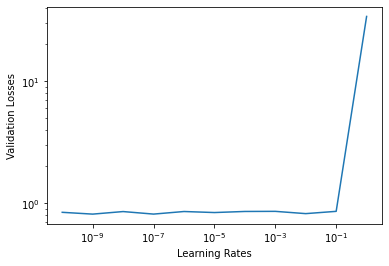

In [15]:
draw_lr_to_losses()

1 0.5841734409332275
0.1 0.9001818895339966
0.01 0.8360582590103149
0.001 0.8490625619888306
0.0001 0.8560377955436707
1e-05 0.8061596751213074
1e-06 0.8316313028335571
1e-07 0.8469758927822113
1e-08 0.8400483131408691
1e-09 0.8356481492519379
1e-10 0.836065024137497


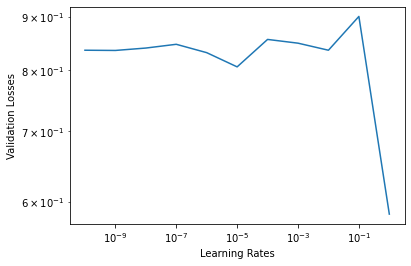

In [16]:
draw_lr_to_losses()

1 0.4316040128469467
0.1 0.9318170249462128
0.01 0.8434635698795319
0.001 0.8255304396152496
0.0001 0.8642092943191528
1e-05 0.8243284225463867
1e-06 0.8102233409881592
1e-07 0.8326072990894318
1e-08 0.8436119854450226
1e-09 0.8353704512119293
1e-10 0.8518120646476746


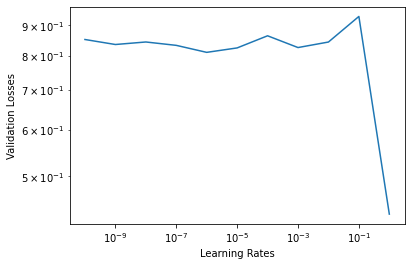

In [17]:
draw_lr_to_losses()

**Conclusion.**

We see that with low learning rates (<=0.1), validation lossed are still almost the same on the three pictures. It can be explained by slow but robust convergence to the minima. However, with the high learning rate equals to 1, we observe strange behaviour: from very low loss value to very high one. In my opinion, high learning rate can help to reach global minimum faster, but it is not stable at all.